In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Cargar archivo csv 
México=pd.read_csv("México sin atipicos.csv")
México.head(1)

,Unnamed: 0,id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,...,property_type,room_type,bathrooms_text,amenities,calendar_updated,has_availability,calendar_last_scraped,last_review,license,instant_bookable
0,0,35797.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,Entire villa,Entire home/apt,1 bath,"[""Free parking on premises"", ""Washer"", ""Wifi"",...",SIN INFORMACION,t,25/09/2024,SIN INFORMACION,SIN INFORMACION,f


In [5]:
México=México.drop(['Unnamed: 0'], axis=1)

In [6]:
México.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           26582 non-null  float64
 1   host_response_rate           26582 non-null  float64
 2   host_acceptance_rate         26582 non-null  float64
 3   host_listings_count          26582 non-null  float64
 4   host_total_listings_count    26582 non-null  float64
 5   accommodates                 26582 non-null  float64
 6   bathrooms                    26582 non-null  float64
 7   bedrooms                     26582 non-null  float64
 8   beds                         26582 non-null  float64
 9   price                        26582 non-null  float64
 10  minimum_nights               26582 non-null  float64
 11  maximum_nights               26582 non-null  int64  
 12  availability_30              26582 non-null  int64  
 13  availability_60 

<Axes: xlabel='number_of_reviews', ylabel='id'>

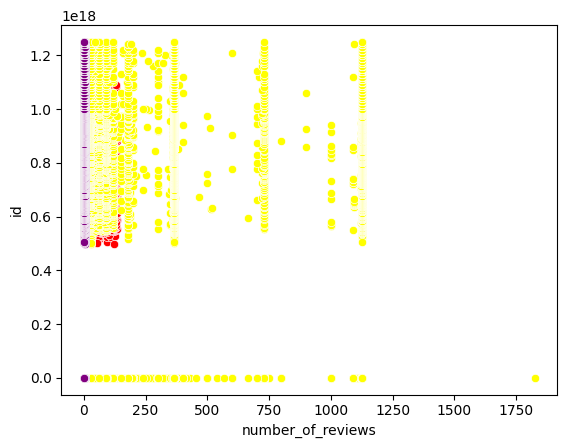

In [69]:
from turtle import color


sns.scatterplot(x='number_of_reviews', y='id', color="red", data=México)
sns.scatterplot(x='maximum_nights', y='id', color="yellow", data=México)
sns.scatterplot(x='minimum_nights', y='id', color="purple", data=México)
#sns.scatterplot(x='availability_60', y='id', color="blue", data=México)

In [71]:
Vars_Indep= México[['number_of_reviews', 'maximum_nights','minimum_nights']]
Var_Dep= México['id']

In [72]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'maximum_nights', 'minimum_nights'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-4.52895479e+15, -2.74405790e+14, -9.63129182e+16]),
 'rank_': 3,
 'singular_': array([68902.23238984,  5085.24851246,   106.74444734]),
 'intercept_': 9.498283723168991e+17}

In [73]:
model.score(Vars_Indep,Var_Dep)

0.17520504468647313

In [75]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=México[['number_of_reviews', 'maximum_nights','minimum_nights']])
y_pred

array([8.51594614e+17, 4.63504234e+17, 5.27051577e+17, ...,
       7.53357341e+17, 7.53357341e+17, 7.53357341e+17])

In [77]:
México.insert(0, 'Prediccion', y_pred)

<Axes: xlabel='maximum_nights', ylabel='id'>

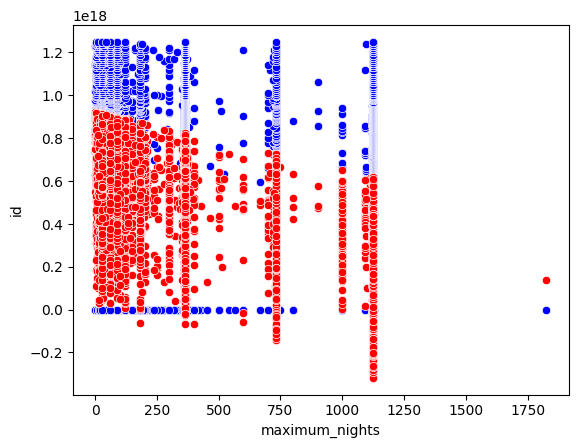

In [78]:
sns.scatterplot(x='maximum_nights', y='id', color="blue", data=México)
sns.scatterplot(x='maximum_nights', y='Predicciones', color="red", data=México)

In [79]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.17520504468647313

In [80]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.4185750167968379

**host_acceptance_rate**

<Axes: xlabel='host_listings_count', ylabel='host_acceptance_rate'>

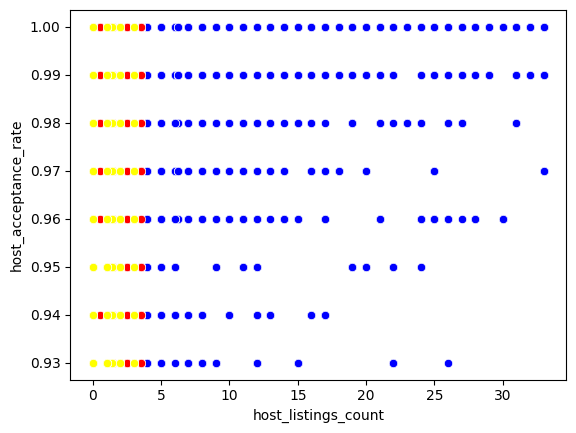

In [7]:
from turtle import color


sns.scatterplot(x='host_listings_count', y='host_acceptance_rate', color="blue", data=México)
sns.scatterplot(x='bathrooms', y='host_acceptance_rate', color="red", data=México)
sns.scatterplot(x='beds', y='host_acceptance_rate', color="yellow", data=México)

In [8]:
Vars_Indep= México[['host_listings_count', 'bathrooms','beds']]
Var_Dep= México['host_acceptance_rate']

In [9]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_listings_count', 'bathrooms', 'beds'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.00013536, -0.00052127, -0.0008405 ]),
 'rank_': 3,
 'singular_': array([1097.7505098 ,  155.27171441,   80.64081917]),
 'intercept_': 0.9959785970367596}

In [10]:
model.score(Vars_Indep,Var_Dep)

0.009230501876308361

In [11]:
y_pred= model.predict(X=México[['host_listings_count', 'bathrooms','beds']])
y_pred

array([0.99448146, 0.99435426, 0.99337024, ..., 0.99245104, 0.99245104,
       0.99407538])

In [12]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.009230501876308361

In [13]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.09607550091625003

**host_is_superhost**

In [14]:
México["host_is_superhost"] = México["host_is_superhost"].replace({"t": 1, "f": 0, "SIN INFORMACION": 0})

C:\Users\angie\AppData\Local\Temp\ipykernel_18252\1299569370.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  México["host_is_superhost"] = México["host_is_superhost"].replace({"t": 1, "f": 0, "SIN INFORMACION": 0})


<Axes: xlabel='number_of_reviews_ltm', ylabel='host_is_superhost'>

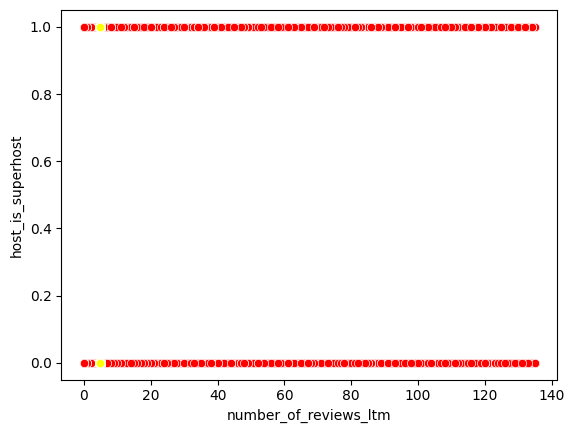

In [16]:
from turtle import color


sns.scatterplot(x='number_of_reviews_ltm', y='host_is_superhost', color="blue", data=México)
sns.scatterplot(x='number_of_reviews', y='host_is_superhost', color="red", data=México)
sns.scatterplot(x='review_scores_rating', y='host_is_superhost', color="yellow", data=México)

In [18]:
Vars_Indep= México[['number_of_reviews_ltm', 'number_of_reviews','review_scores_rating']]
Var_Dep= México['host_is_superhost']

In [19]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.010504  , 0.00221854, 0.82398524]),
 'rank_': 3,
 'singular_': array([5265.41508878, 1705.83881627,   21.49604236]),
 'intercept_': -3.787129356341489}

In [20]:
model.score(Vars_Indep,Var_Dep)

0.18563383285887347

In [21]:
y_pred= model.predict(X=México[['number_of_reviews_ltm', 'number_of_reviews','review_scores_rating']])
y_pred

array([0.16799981, 0.12870946, 0.40112265, ..., 0.16799981, 0.16799981,
       0.16799981])

In [22]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.18563383285887347

In [23]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.4308524490575323

**host_total_listings_count**

<Axes: xlabel='host_listings_count', ylabel='host_total_listings_count'>

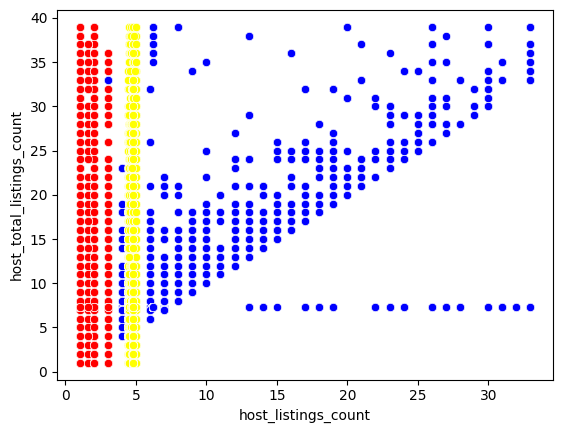

In [24]:
from turtle import color


sns.scatterplot(x='host_listings_count', y='host_total_listings_count', color="blue", data=México)
sns.scatterplot(x='minimum_nights', y='host_total_listings_count', color="red", data=México)
sns.scatterplot(x='review_scores_rating', y='host_total_listings_count', color="yellow", data=México)

In [25]:
Vars_Indep= México[['host_listings_count', 'minimum_nights','review_scores_rating']]
Var_Dep= México['host_total_listings_count']

In [26]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_listings_count', 'minimum_nights', 'review_scores_rating'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.96405253, -0.07640896, -0.59716317]),
 'rank_': 3,
 'singular_': array([1097.87885016,  105.45174272,   21.30757114]),
 'intercept_': 4.3800153557613815}

In [27]:
model.score(Vars_Indep,Var_Dep)

0.7106666028449202

In [28]:
y_pred= model.predict(X=México[['host_listings_count', 'minimum_nights','review_scores_rating']])
y_pred

array([ 2.40127572, 13.13722949,  4.19325552, ..., 16.86206373,
       16.86206373,  5.29343333])

In [29]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.7106666028449202

In [31]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.8430104405313853

**accommodates**

<Axes: xlabel='bedrooms', ylabel='accommodates'>

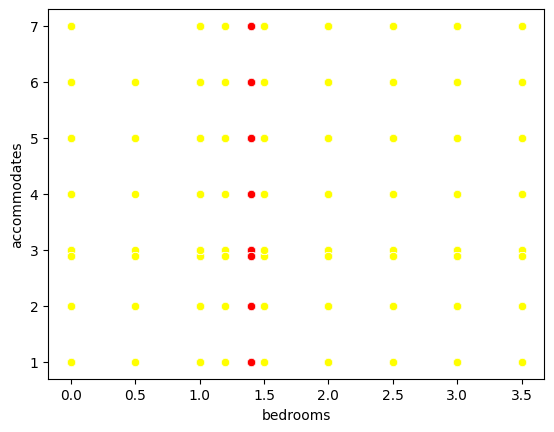

In [32]:
from turtle import color


sns.scatterplot(x='bedrooms', y='accommodates', color="blue", data=México)
sns.scatterplot(x='beds', y='accommodates', color="red", data=México)
sns.scatterplot(x='bathrooms', y='accommodates', color="yellow", data=México)

In [33]:
Vars_Indep= México[['bedrooms', 'beds','bathrooms']]
Var_Dep= México['host_is_superhost']

In [34]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'beds', 'bathrooms'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.00504347, 0.06823552, 0.04294417]),
 'rank_': 3,
 'singular_': array([170.81027106,  87.75113921,  79.47557824]),
 'intercept_': 0.2142133953939553}

In [35]:
model.score(Vars_Indep,Var_Dep)

0.026609774780482764

In [36]:
y_pred= model.predict(X=México[['bedrooms', 'beds','bathrooms']])
y_pred

array([0.33043655, 0.22127425, 0.40371554, ..., 0.33043655, 0.33043655,
       0.33043655])

In [37]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.026609774780482764

In [38]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.16312502806278

**bedrooms**

<Axes: xlabel='accommodates', ylabel='bedrooms'>

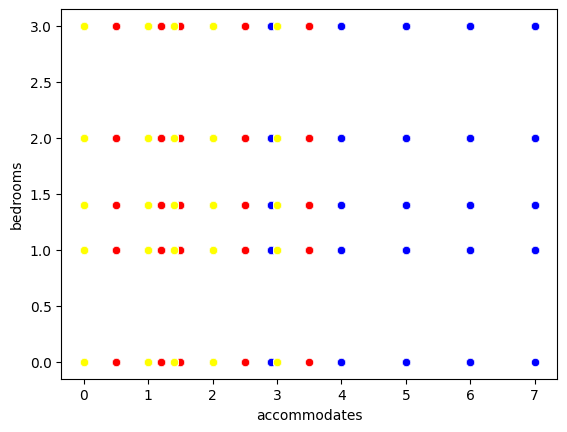

In [39]:
from turtle import color


sns.scatterplot(x='accommodates', y='bedrooms', color="blue", data=México)
sns.scatterplot(x='bathrooms', y='bedrooms', color="red", data=México)
sns.scatterplot(x='beds', y='bedrooms', color="yellow", data=México)

In [40]:
Vars_Indep= México[['accommodates', 'beds','bathrooms']]
Var_Dep= México['bedrooms']

In [42]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'beds', 'bathrooms'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.27395628, 0.03132676, 0.24479909]),
 'rank_': 3,
 'singular_': array([252.55796062, 124.66534619,  79.6128088 ]),
 'intercept_': 0.23150549680481203}

In [43]:
model.score(Vars_Indep,Var_Dep)

0.5196079459811843

In [44]:
y_pred= model.predict(X=México[['accommodates', 'beds','bathrooms']])
y_pred

array([1.0555439 , 1.0259787 , 1.63478321, ..., 1.0555439 , 1.0555439 ,
       1.0555439 ])

In [45]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.5196079459811843

In [46]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7208383632834647

**Price**

<Axes: xlabel='bedrooms', ylabel='price'>

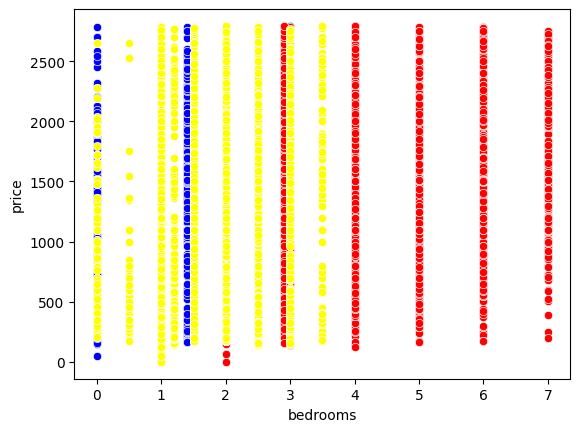

In [47]:
from turtle import color


sns.scatterplot(x='bedrooms', y='price', color="blue", data=México)
sns.scatterplot(x='accommodates', y='price', color="red", data=México)
sns.scatterplot(x='bathrooms', y='price', color="yellow", data=México)

In [48]:
Vars_Indep= México[['bedrooms', 'accommodates','bathrooms']]
Var_Dep= México['price']

In [49]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'accommodates', 'bathrooms'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 74.69204364, 133.44759504, -82.32737137]),
 'rank_': 3,
 'singular_': array([252.25894581, 106.89860397,  71.1393357 ]),
 'intercept_': 697.9700510745805}

In [50]:
model.score(Vars_Indep,Var_Dep)

0.1562595472173195

In [51]:
y_pred= model.predict(X=México[['bedrooms', 'accommodates','bathrooms']])
y_pred

array([ 957.22991343, 1189.53693778, 1298.81714715, ...,  957.22991343,
        957.22991343,  957.22991343])

In [52]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.1562595472173195

In [53]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.3952967837173982

**review_scores_value**

<Axes: xlabel='review_scores_rating', ylabel='review_scores_value'>

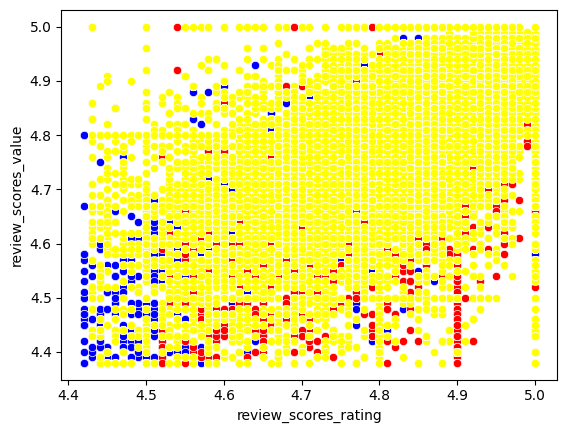

In [54]:
from turtle import color


sns.scatterplot(x='review_scores_rating', y='review_scores_value', color="blue", data=México)
sns.scatterplot(x='review_scores_accuracy', y='review_scores_value', color="red", data=México)
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_value', color="yellow", data=México)

In [55]:
Vars_Indep= México[['review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness']]
Var_Dep= México['review_scores_value']

In [56]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_rating', 'review_scores_accuracy',
        'review_scores_cleanliness'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.4591728 , 0.3960566 , 0.13216381]),
 'rank_': 3,
 'singular_': array([30.38213928, 14.04417216, 11.18920804]),
 'intercept_': 0.009643266246372129}

In [57]:
model.score(Vars_Indep,Var_Dep)

0.558278630372429

In [58]:
y_pred= model.predict(X=México[['review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness']])
y_pred

array([4.74913064, 4.53984266, 4.7924003 , ..., 4.74913064, 4.74913064,
       4.74913064])

In [59]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.558278630372429

In [60]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7471804536873465

**reviews_per_month**

<Axes: xlabel='number_of_reviews_ltm', ylabel='reviews_per_month'>

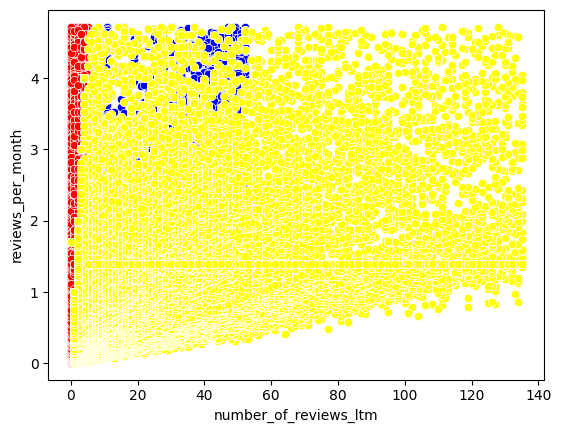

In [61]:
from turtle import color


sns.scatterplot(x='number_of_reviews_ltm', y='reviews_per_month', color="blue", data=México)
sns.scatterplot(x='number_of_reviews_l30d', y='reviews_per_month', color="red", data=México)
sns.scatterplot(x='number_of_reviews', y='reviews_per_month', color="yellow", data=México)

In [62]:
Vars_Indep= México[['number_of_reviews_ltm', 'number_of_reviews_l30d','number_of_reviews']]
Var_Dep= México['reviews_per_month']

In [63]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)
model.fit(X=Vars_Indep, y=Var_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'number_of_reviews_l30d',
        'number_of_reviews'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.04553039,  0.17922565, -0.00034491]),
 'rank_': 3,
 'singular_': array([5265.95751701, 1708.03116194,  173.22147592]),
 'intercept_': 0.7983026509553431}

In [64]:
model.score(Vars_Indep,Var_Dep)

0.46667068678107093

In [65]:
y_pred= model.predict(X=México[['number_of_reviews_ltm', 'number_of_reviews_l30d','number_of_reviews']])
y_pred

array([0.79830265, 0.77622863, 0.96352378, ..., 0.79830265, 0.79830265,
       0.79830265])

In [66]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.46667068678107093

In [67]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.6831329934800916